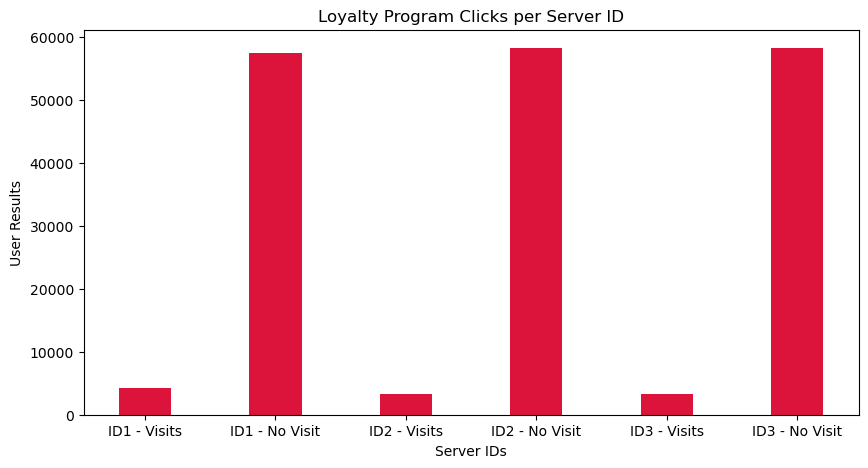

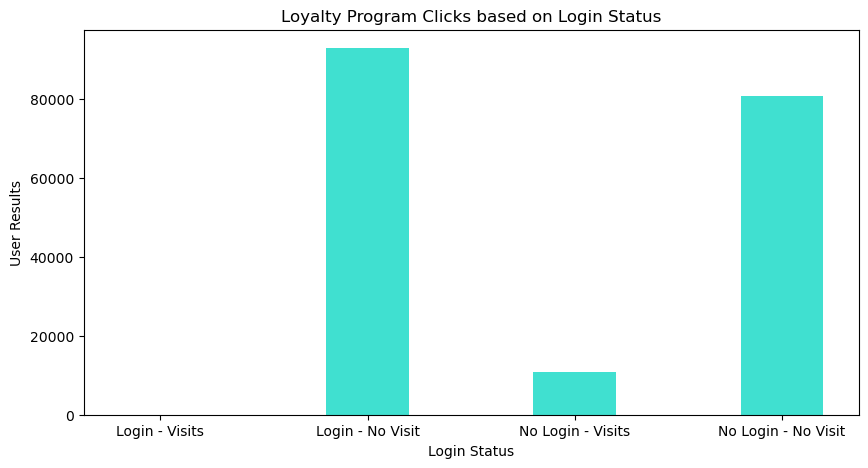

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib as pyplot
import matplotlib.pyplot as plt

ABdata = pd.read_excel(r'C:\Users\hecto\OneDrive\Documents\Jupyter Notebook\Grocery Data\grocerydata.xlsx')


#BUILDING CONTINGENCY TABLE 1
numRows = ABdata.shape[0]
login_visit = 0
no_login_visit = 0
login_no_visit = 0
no_login_no_visit = 0

for i in range(numRows):
    if (ABdata["LoggedInFlag"][i] == 0 and ABdata["VisitPageFlag"][i] == 0):
        no_login_no_visit += 1
    elif (ABdata["LoggedInFlag"][i] == 1 and ABdata["VisitPageFlag"][i] == 0):
        login_no_visit += 1
    elif (ABdata["LoggedInFlag"][i] == 0 and ABdata["VisitPageFlag"][i] == 1):
        no_login_visit += 1
    elif (ABdata["LoggedInFlag"][i] == 1 and ABdata["VisitPageFlag"][i] == 1):
        login_visit += 1
    else:
        print("Error - Contingency Table 1 cannot be constructed")


#BUILDING CONTINGENCY TABLE 2	
ID1_visit = 0
ID1_no_visit = 0
ID2_visit = 0
ID2_no_visit = 0
ID3_visit = 0
ID3_no_visit = 0

for i in range(numRows):
    if (ABdata["VisitPageFlag"][i] == 1 and ABdata["ServerID"][i] == 1):
        ID1_visit += 1
    elif (ABdata["VisitPageFlag"][i] == 0 and ABdata["ServerID"][i] == 1):
        ID1_no_visit += 1
    elif (ABdata["VisitPageFlag"][i] == 1 and ABdata["ServerID"][i] == 2):
        ID2_visit += 1
    elif (ABdata["VisitPageFlag"][i] == 0 and ABdata["ServerID"][i] == 2):
        ID2_no_visit += 1
    elif (ABdata["VisitPageFlag"][i] == 1 and ABdata["ServerID"][i] == 3):
        ID3_visit += 1
    elif (ABdata["VisitPageFlag"][i] == 0 and ABdata["ServerID"][i] == 3):
        ID3_no_visit += 1
    else:
        print("Error - Contingency Table 2 cannot be constructed")



#CHI SQUARED TEST ON CONTINGENCY TABLE 1
#  [  logged in, visit    logged in, no visit  ]
#  [  no login, visit      no login, no visit   ]

T1R1 = np.array([login_visit, login_no_visit])
T1R1.reshape(1,2)
T1R2 = np.array([no_login_visit,  no_login_no_visit])
T1R2.reshape(1,2)

table1 = np.array([T1R1, T1R2])
table1.reshape(2,2)
#stat1, p1, dof1 = chi2_contingency(table1)



#CHI SQUARED TEST ON CONTINGENCY TABLE 2
#  [  ID1, visit    ID1, no visit  ]
#  [  ID2, visit    ID2, no visit  ]
#  [  ID3, visit    ID3, no visit  ]

T2R1 = np.array([ID1_visit, ID1_no_visit])
T2R1.reshape(1,2)
T2R2 = np.array([ID2_visit,  ID2_no_visit])
T2R2.reshape(1,2)
T2R3 = np.array([ID3_visit,  ID3_no_visit])
T2R3.reshape(1,2)

table2 = np.array([T2R1, T2R2, T2R3])
table2.reshape(3,2)
#stat2, p2, dof2 = chi2_contingency(table2)

#Check our hypotheses
sig_level = 0.05


'''
if p1 <= sig_level:
    print("Logging in and visiting the Loyalty Page are correlated", "\n")
else:
    print("Logging in and visiting the Loyalty Page are NOT correlated", "\n")

if p2 <= sig_level:
    print("Server ID and visiting the Loyalty Page are correlated", "\n")
else:
    print("Server ID and visiting the Loyalty Page are NOT correlated", "\n")
'''

#Based on the results of the Chi Squared Test for association, it appears our results ar
#statistically significant. However, lets visualize our results to confirm

import matplotlib.pyplot as plt
 
  
#Organize Plot Data
data = {'ID1 - Visits':ID1_visit, 'ID1 - No Visit':ID1_no_visit, 
        'ID2 - Visits':ID2_visit, 'ID2 - No Visit':ID2_no_visit,
        'ID3 - Visits':ID3_visit, 'ID3 - No Visit':ID3_no_visit}

server_categories = list(data.keys())
server_results = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(server_categories, server_results, color ='crimson',
        width = 0.4)
 
plt.xlabel("Server IDs")
plt.ylabel("User Results")
plt.title("Loyalty Program Clicks per Server ID")
plt.show()


#Organize Plot Data
data2 = {'Login - Visits':login_visit, 'Login - No Visit':login_no_visit, 
        'No Login - Visits':no_login_visit, 'No Login - No Visit':no_login_no_visit}

login_categories = list(data2.keys())
login_results = list(data2.values())
  
fig2 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(login_categories, login_results, color ='turquoise',
        width = 0.4)
 
plt.xlabel("Login Status")
plt.ylabel("User Results")
plt.title("Loyalty Program Clicks based on Login Status")
plt.show()






The Cramers V value for login status and link clicks is: 0.2503765191994929


The Cramers V value for Server ID and link clicks is: 0.028589837784682444
Feature: 0, Score: 0.97449
Feature: 1, Score: 0.02551


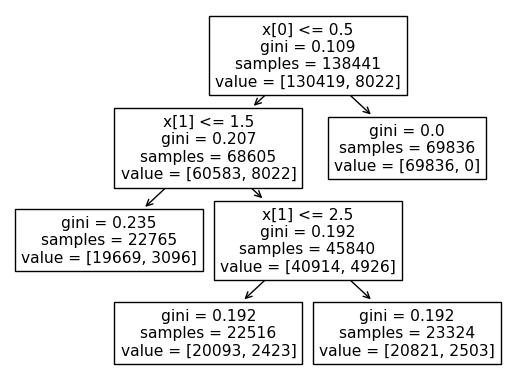

In [2]:
#Our statistical test tells us there is a statistically significant relationship between
#our categorical variables, but in some cases the plots do not show an immediately evident
#trend. As such, we'll calculate Cramer's V to quantify the strength of association

print('The Cramers V value for login status and link clicks is: {}'.format(association(table1)))
print('\n')
print('The Cramers V value for Server ID and link clicks is: {}'.format(association(table2)))

#As we can see, the Cramer's V is only subtantial for the correlation between login status and clicks
#with a value of 0.25 indicating a moderate degree of association. We can also build a decision tree
#to aid in understanding the relationships contained within the data

myTree = DecisionTreeClassifier(max_depth = 5)
x_data = ABdata[['LoggedInFlag', 'ServerID']]
y_data = ABdata[['VisitPageFlag']]
x_data = x_data.to_numpy()
y_data = y_data.to_numpy()

x_0, xt_0, y_0, yt_0 = train_test_split(x_data, y_data)

myTree.fit(x_0, y_0)
plot_tree(myTree)

importance = myTree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2_contingency
stat1, p1, dof1, expected1 = chi2_contingency(table1)

In [4]:
#Given our new information, we'll make a simple ML model that predicts the probability of a user clicking on the loyalty 
#page. To save time and resources, we'll build the model off of login status since we've determined that to be the most 
#important predictor.

#x_data = np.delete(x_data, 1, axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.reshape(-1,), test_size = 0.3)

myClassifier = SGDClassifier()
myClassifier.fit(x_train, y_train)
predicted = myClassifier.predict(x_test)
print("Your classifier accuracy is: {}".format(accuracy_score(predicted, y_test)))

Your classifier accuracy is: 0.9425754374559835


In [9]:
#We can see above that we've achieved a very high accuracy using a basic classifier, despite having +180,000 datapoints.
#We should note however that based on our data visualization, anyone should be able to achieve a respectable prediction 
#accuracy based on our predictors. Essentially, if you always guess that a person is not going to log in, you would be correct
#in ~94% percent of cases, which is equivalent to our model accuracy. In this case, data visualization alone would have been 
#sufficient to draw conclusions from, as the data is not complex enough to train a model upon.